## Problem Statement

- Predict the approximate position and velocity of the satellite orbiting the Earth after 4 hours since it passed the periapsis.

## Given values to solve the problem
- $a = 25,512 \ km$
- $e = 0.625$      
- $f(0) = 0$ = true anomaly at starting point


## Solution steps and the Equations to use for those steps

In [ ]:
# t --> M --> E --> f --> r --> v

**1)** Mean Anomaly at given time t:
  - $M(t) =nt$ where $n = \sqrt{\frac{\mu}{a^3}}$, and $\mu = GM$
  - sfrutto il perigeo come punto di intersezione con l'orbita CIRCOLARE -> in quel punto (uguale per orbita ellittica e circolare) il satellite avrà una velocità pari alla velocità angolare media (costante) che ha sull'orbita circolare.
  

**2)** Eccentric Anomaly for the value of M in previous step (Kepler's Equation):
  - $M = E - esinE$

**3)** True Anomaly for the value of E in previous step:
  - $tan \frac{f}{2} = \sqrt{\frac{1+e}{1-e}}tan \frac{E}{2}$

**4)** Position of Satellite at True Anomaly:
  - $r(t) = \frac{a(1-e^2)}{1 + ecos(f(t))}$

**5)** Velocity (Vis Viva Equation) at given position:
  - $v = \sqrt{\mu(\frac{2}{r} - \frac{1}{a})}$

## Solution to the problem statement (step by step)

In [1]:
# Importing necessary libraries
import numpy as np

### 1) Finding the Mean Anomaly after 4 hours from the periapsis.

In [3]:
'''Define the constants'''
G = 6.6743e-11 # Gravitational Constant
m1 = 5.972e24  # Mass of Earth
a = 25512e3    # Semi Major Axis of the orbit
e = 0.625      # Eccentricity of the orbit
t = 4*3600     # Seconds since the periapsis

'''Calculate the Gravitational parameter for Earth'''
mu = G*m1      # mu = GM

'''Calculate the average angular speed of an object in its orbit around another object'''
n = np.sqrt(mu/a**3)  # n = sqrt(mu/a^3)

'''Calculate the Mean Anomaly since the 4 hours of the periapsis'''
M = n*t        # M = nt

'''Print the value'''
print(f'The Mean Anomaly since the periapsis is {round(M, 3)} rad')

The Mean Anomaly since the periapsis is 2.231 rad


### 2) Using Kepler's Equation to Numerically Solve for Eccentric Anomaly for given Mean Anomaly

In [ ]:
# f(x) = 0 -> E - e*np.sin(E) - M = 0
# come trovo f(x)  ? -> Newton - Raphson

## Newton-Raphson Method to Solve Kepler's Equation

We want to solve the equation:

    f(E) = E - e * sin(E) - M = 0

To find the eccentric anomaly `E`, we use the Newton-Raphson iteration formula:

    E_next = E_current - f(E_current) / f'(E_current)

Where:

    f(E)   = E - e * sin(E) - M
    f'(E)  = 1 - e * cos(E)

Notes:

- `M` is the mean anomaly (known input)
- `e` is the eccentricity (known input)
- `E` is the eccentric anomaly (unknown, to compute)

You iterate until the difference between successive estimates of E is smaller than a given tolerance:

    |E_next - E_current| < tolerance


In [7]:
# Defining Functions for Kepler Equation, Derivative of Kepler Equation and Newton-Raphson Method
def kepler_eq(E, M, e):
    '''
    Kepler's Equation:-
    M = E - esin(E)

    Converting it to the format of f(x) = 0
    E - esin(E) - M = 0
    '''

    return E - e*np.sin(E) - M

def derivative_kepler_eq(E, e):
  '''
  Derivative of Kepler's Equation for Newton Raphson
  M = E - esin(E)
  dM/dE = 1 - ecos(E)
  '''
  return 1 - e*np.cos(E)

def newton_raphson(kepler_eq, derivative_kepler_eq, Eprev, eps, e, M):
    '''
    kepler_eq - Kepler's Equation
    derivative_kepler_eq - Derivative of Kepler's Equation
    Eprev - Initial guess for E
    eps - Tolerance
    e, M - Parameters for the equations
    '''
    Enew = Eprev - kepler_eq(Eprev, M, e) / derivative_kepler_eq(Eprev, e)

    if np.abs(Enew - Eprev) > eps:
        return newton_raphson(kepler_eq, derivative_kepler_eq, Enew, eps, e, M)

    return Enew


In [8]:
# # If you don't understand lambda function try this:

# '''
# Syntax of Lambda function
# output_of_expression = lambda argument : expression
# '''

# '''Square the number that is passed as arrgument of the lambda function'''
# squared_val = lambda x : x**2
# print(squared_val(5))

In [9]:
# Initial value of E is usually used as the value of M
E = M

# Set the threshold value for Newton-Raphson Method
eps = 1e-06

# Find the Eccentric Anomaly for given conditions above
E_final = newton_raphson(kepler_eq, derivative_kepler_eq, E, eps, e, M)

# Print the final value of E at given M
print(f'The Eccentric Anomaly at M = {round(M, 3)} is : {round(E_final, 3)} rad')

The Eccentric Anomaly at M = 2.231 is : 2.569 rad


### 3) Calculate True Anomaly from the above Eccentric Anomaly

In [12]:
'''
Equation -
f = 2arctan(sqrt((1+e)/(1-e))tanE/2)
'''

f = 2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E_final/2))
print(f'The True Anomaly at given postion is {round(f, 3)} rad')

The True Anomaly at given postion is 2.861 rad


### 4) The position of the Satellite at this True Anomaly

In [13]:
'''
Equation:-
r = a(1 - e^2)/(1 + ecosf)
'''
r = a*(1-e**2)/(1+e*np.cos(f))

print(f'Distance between the Earth and the Satellite at True Anomaly of {round(f, 3)} is {round(r/10**3, 3)} km')

Distance between the Earth and the Satellite at True Anomaly of 2.861 is 38917.602 km


### 5) Velocity at given position (Vis - Viva Equation)

In [15]:
'''
Formula:-
v = sqrt(mu(2/r - 1/a))
'''

v = np.sqrt(mu*(2/r - 1/a))

print(f'The velocity of the satellite at distance of {round(r/10**3,3)} km from the Earth is {round(v/10**3,3)} km/s')

The velocity of the satellite at distance of 38917.602 km from the Earth is 2.205 km/s


## Conclusions



In [ ]:
# Convert this true anomaly from rad into degrees
np.degrees(2.861)  

163.92322518692853

- According to our calculations, we should approximately find this satellite in this position after 4 hours since it crosses the periapsis:

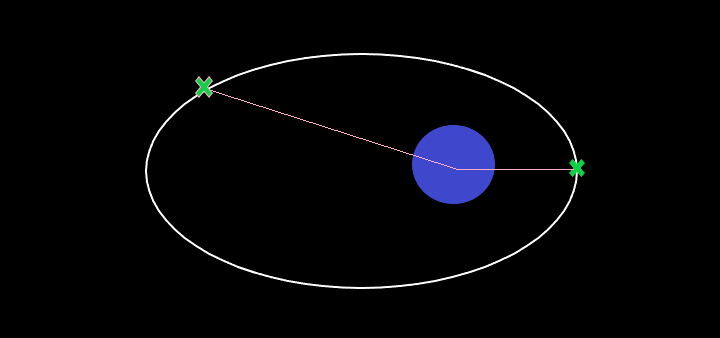